<a href="https://colab.research.google.com/github/ankitbittu/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Notebook_(TEAM_'POWER')_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **“If I had an hour to solve a problem I'd spend 55 minutes thinking about the problem and 5 minutes thinking about solutions.”**
# ― **Albert Einstein**

#PROBLEM SOLVING APPROACH :
Hello , This is Team "Power", and this is a Exploratory Data Analysis Capstone project. We decided to move ahead with the project in 5 steps as breaking down a problem is very important. It provides us the analysis of different variables of data and relations among them.

1. Understanding the problem : We analyzed the problem statement and the final objectives to be set for the solution. Understanding the concept of 'churning' from business point of view is also important.

2. Analyzing the given dataset, checking its sanity and then proceeding with further analysis. After being comfortable with the dataset; we explored the various columns and their trends if any. 

3. A picture is worth 1000 words, we took it seriously and tried to explain relation among variables by different types of visualization techniques.

4. We also checked how multiple variables are affecting churned customers.

5. In last step we summed up our results and came up with the inferences and recommendations.

# Import And Description Of DataSet

In [ ]:
# Importing Drive into colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as mtick

In [ ]:
# Importing data from csv_file to python pandas
#telecom_data = pd.read_csv("/content/drive/MyDrive/Almabetter/project/Telecom Churn.csv")
telecom_data = pd.read_csv("/content/drive/MyDrive/Almabetter/project/Telecom Churn.csv")

In [ ]:
# Checking first 15 rows of data
telecom_data.head(15)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [ ]:

# Checking last 15 rows of data
telecom_data.tail(15)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3318,OK,52,415,No,No,0,124.9,131,21.23,300.5,118,25.54,192.5,106,8.66,11.6,4,3.13,2,False
3319,WY,89,415,No,No,0,115.4,99,19.62,209.9,115,17.84,280.9,112,12.64,15.9,6,4.29,3,False
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3321,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False


In [ ]:
# Checking Null values in columns and object type of column
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     3333 non-null   object 
 1   Account length            3333 non-null   int64  
 2   Area code                 3333 non-null   int64  
 3   International plan        3333 non-null   object 
 4   Voice mail plan           3333 non-null   object 
 5   Number vmail messages     3333 non-null   int64  
 6   Total day minutes         3333 non-null   float64
 7   Total day calls           3333 non-null   int64  
 8   Total day charge          3333 non-null   float64
 9   Total eve minutes         3333 non-null   float64
 10  Total eve calls           3333 non-null   int64  
 11  Total eve charge          3333 non-null   float64
 12  Total night minutes       3333 non-null   float64
 13  Total night calls         3333 non-null   int64  
 14  Total ni

**FROM THE INFORMATION REGARDING THE DATASET GATHERED TILL NOW; IT IS INFERRED THAT THERE ARE 3333 ENTRIES. EACH OF THE COLUMNS IN THE DATASET HAS 3333 NON-NULL VALUES OF DIFFERENT DATA TYPES. THEREFORE THE DATASET IS CLEAN AND HAS NO UNDEFINED OR NULL VALUES.**

**FURTHER IT IS ALSO DEDUCED THAT NUMERICAL BASED DATA COLUMNS DO NOT CONSIST OF SAY STRING VALUES OR OTHER NON-NUMERICAL DATA TYPES SINCE ALL NUMERICAL COLUMNS HAVE EITHER 'int64' OR 'float64' DTYPE. IF A MIX OF NUMERICAL AND NON-NUMERICAL VALUES WOULD HAVE BEEN PRESENT IN NUMERICAL BASED COLUMNS; THEN DTYPE WOULD HAVE BEEN 'Object'.**

**HENCE NOW ONLY 'International plan' AND 'Voice mail plan' HAVE TO BE ANALYZED SINCE ALL OTHER COLUMNS WILL NOT HAVE MISCELLANEOUS DATA TYPES FROM THE ANALYSIS WE DID ABOVE. COLUMN 'State' NEED NOT TO BE ANALYZED SINCE IT CAN BE ASSIGNED ANY NAME. ONLY FURTHER ANALYSIS WILL REVEAL MORE ABOUT CONTENTS ABOUT 'State' COLUMN.**

In [ ]:
(telecom_data['International plan']=='Yes').value_counts()

False    3010
True      323
Name: International plan, dtype: int64

**HENCE 'International plan' COLUMN CONSISTS OF ONLY 'Yes' OR 'No' SINCE THE SUM OF TRUE AND FALSE IS 3333.**

In [ ]:
(telecom_data['Voice mail plan']=='Yes').value_counts()

False    2411
True      922
Name: Voice mail plan, dtype: int64

**HENCE 'Voice mail plan' COLUMN CONSISTS OF ONLY 'Yes' OR 'No' SINCE THE SUM OF TRUE AND FALSE IS 3333.**

In [ ]:
# Checking mean, median, count of different columns of data
telecom_data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,total_charges,total_minutes,Intl_min_per_unit_charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3315.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,56.685173,581.627483,3.702934
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,10.487816,89.969330,0.004508
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,19.980000,275.200000,3.666667
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,49.590000,521.000000,3.699634
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,56.630000,583.100000,3.703704
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,63.650000,642.500000,3.706294
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,92.560000,876.900000,3.728814


**FROM THE DESCRIPTION METHOD OF PANDAS DATAFRAME; WE GET TO KNOW THAT NUMERICAL BASED COLUMNS FOR OUR DATASET DO NOT CONSIST OF ANY NEGATIVE VALUES NOR NUMERICAL VALUES WHICH QUESTION THE DESCRIPTION OF THE RESPECTIVE COLUMNS. HENCE WE CAN GO AHEAD WITH THE USAGE OF THE DATASET FOR OUR FURTHER ANALYSIS.**

# **Column Analysis**

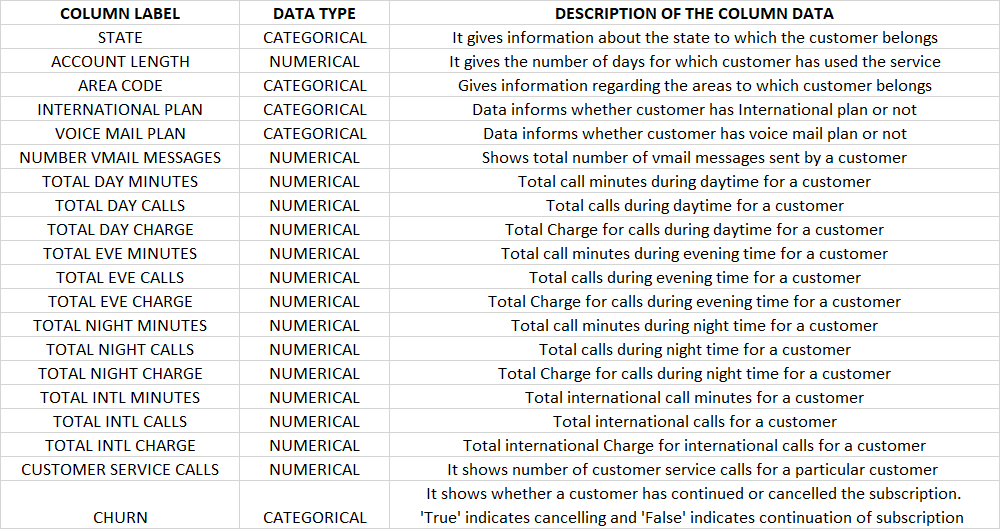

**TILL NOW WE HAVE A GRASP OVER WHAT THE DATASET IS PROVIDING INFORMATION TO US. THE DATASET BASICALLY REPRESENTS 3333 CUSTOMERS USING THE CONCERNED COMPANY'S TELECOM SERVICE. FINALLY THE DATASET PROVIDES INFORMATION REGARDING WHETHER THE CUSTOMER HAS CHURNED OR NOT.**  

#Creating a column total_charges which has sum of night, day, evening charges


**THE IDEA BEHIND CREATING A COLUMN WHICH GIVES THE TOTAL CHARGE PAID BY A CUSTOMER ON A DAY IS TO BASICALLY HAVE A VALUE WHICH MEASURES THE TOTAL PRICE PAID BY A CUSTOMER; WHICH WILL BE HELPFUL WHILE FINDING RELATIONS AMONG VARIOUS FIELDS OF THE DATASET.**

In [ ]:
# This new column helps us to analyzed as per total charges a customer paid
telecom_data['total_charges'] = telecom_data['Total night charge'] + telecom_data['Total day charge'] + telecom_data['Total eve charge']
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36


# Column total_minutes have sum of day, evening, night minutes

**THE IDEA BEHIND CREATING A COLUMN WHICH GIVES THE TOTAL CALLING MINUTES OF A CUSTOMER ON A DAY IS TO BASICALLY HAVE A VALUE WHICH MEASURES THE TOTAL MINUTES A CUSTOMER TALKS; WHICH WILL BE HELPFUL WHILE FINDING RELATIONS AMONG VARIOUS FIELDS OF THE DATASET.**

In [ ]:
# Total Minutes columns shows us how much a customer is engaged per day
telecom_data['total_minutes'] = telecom_data['Total day minutes'] + telecom_data['Total eve minutes'] + telecom_data['Total night minutes']
telecom_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,total_charges,total_minutes
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,72.86,707.2
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,55.54,611.5
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,59.00,527.2
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,65.02,558.2
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,49.36,501.9


# Performing Univariate Analysis

**THE PURPOSE OF UNIVARIATE ANALYSIS IS TO EXPLORE EACH INDIVIDUAL FIELD WHICH REFERS TO EACH COLUMN IN OUR DATASET. THIS WILL BE HELPFUL TO UNDERSTAND THE TRENDS OF EACH FIELD.**

### **FOR STATE COLUMN**

Text(0.5, 0, 'States')

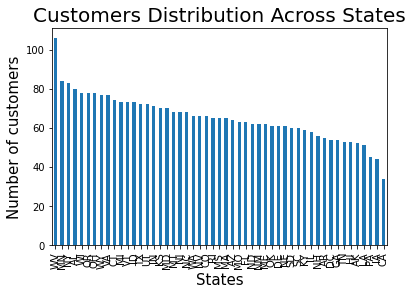

In [ ]:
state=telecom_data['State'].value_counts()
state.plot(kind='bar')
plt.rcParams['figure.figsize'] = (40,5)
plt.title('Customers Distribution Across States',fontsize = 20)
plt.ylabel('Number of customers',fontsize=15)
plt.xlabel('States',fontsize=15)

**THE PLOT GIVES INFORMATION REGARDING THE DISTRIBUTION OF CUSTOMERS ACROSS THE STATES IN A DESCENDING FASHION.**

### **For Account Length**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Account Length Distribution')]

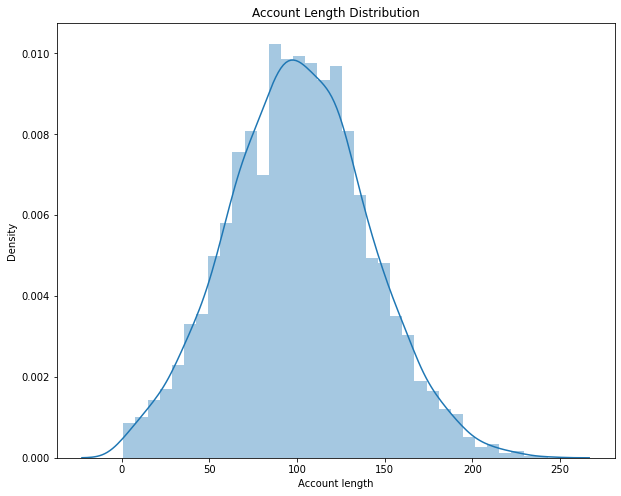

In [ ]:
# ACCOUNT LENGTH ANALYSIS:
account_length = telecom_data['Account length']
plt.rcParams['figure.figsize'] = (10,8)
sns.distplot(account_length, hist=True).set(title='Account Length Distribution')

In [ ]:
account_length.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: Account length, dtype: float64

**IT IS OBSERVED THAT CUSTOMERS HAVE A MEDIAN 101 DAYS OF ACCOUNT LENGTH AND ALSO THE DISTRIBUTION OF ACCOUNT LENGTHS IS NORMAL DISTRIBUTION.**

### **For Area Code**

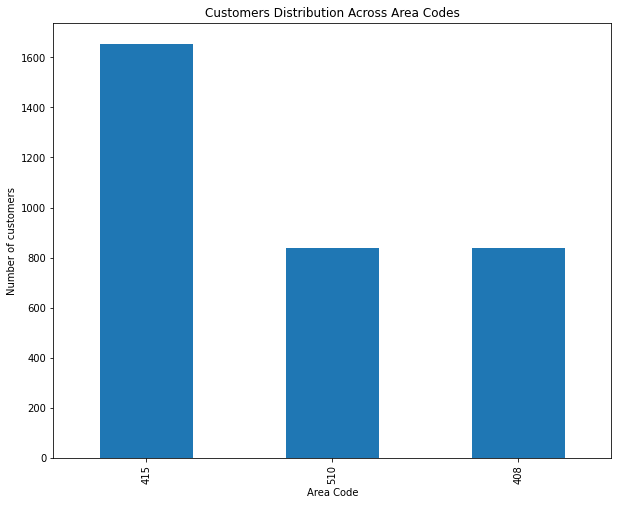

In [ ]:
# AREA CODE ANALYSIS
area_code=telecom_data['Area code'].value_counts()
area_code.plot(kind='bar')
plt.title('Customers Distribution Across Area Codes')
plt.ylabel('Number of customers')
plt.xlabel('Area Code')
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
telecom_data.groupby('Area code')['Area code'].describe()['count']

Area code
408     838.0
415    1655.0
510     840.0
Name: count, dtype: float64

**FROM THE AREA CODE ANALYSIS; WE LEARN THAT THERE ARE THREE DISTINCT AREA CODES IN THE DATASET. MAXIMUM NUMBER OF CUSTOMERS BELONG TO AREA CODE 415.**

### **Voice mail Analysis**

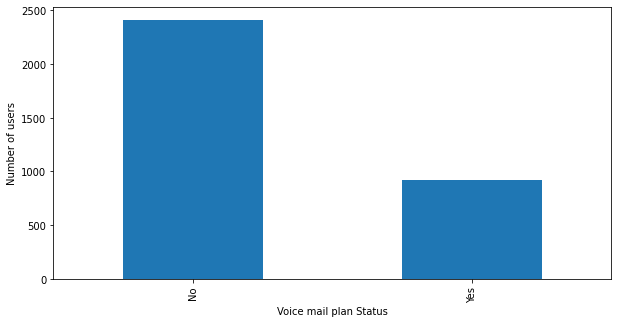

In [ ]:
# VOICE MAIL PLAN ANALYSIS:
voice_plan = telecom_data['Voice mail plan'].value_counts()
voice_plan
voice_plan.plot(kind = 'bar')
plt.xlabel('Voice mail plan Status')
plt.ylabel('Number of users')
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
voice_plan

No     2411
Yes     922
Name: Voice mail plan, dtype: int64

**FROM THE VOICE MAIL PLAN ANALYSIS; WE LEARN THAT MAJORITY OF THE CUSTOMERS DO NOT USE VOICE MAIL PLAN.**

### **For Number of Vmail messages**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


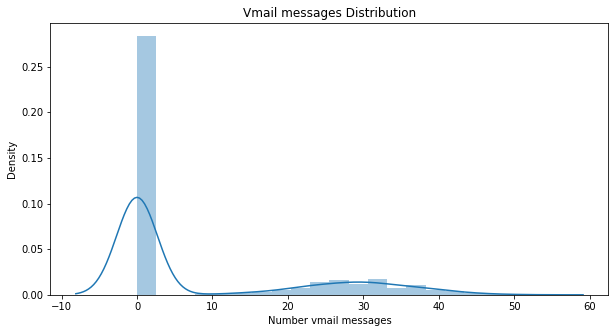

In [ ]:
# NUMBER OF VMAIL MESSAGES ANALYSIS:
num_vmail = telecom_data['Number vmail messages']
sns.distplot(num_vmail, hist=True).set(title='Vmail messages Distribution')
plt.rcParams['figure.figsize'] = (10,5)

**THE DENSITY PEAKS AT 0 FOR NUMBER OF VMAIL MESSAGES WHICH IS LOGICAL SINCE MAJORITY OF CUSTOMERS DO NOT HAVE A VOICE MAIL PLAN AND HENCE FOR THEM NUMBER OF VMAIL MESSAGES IS ZERO.**

### **For Total day minutes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


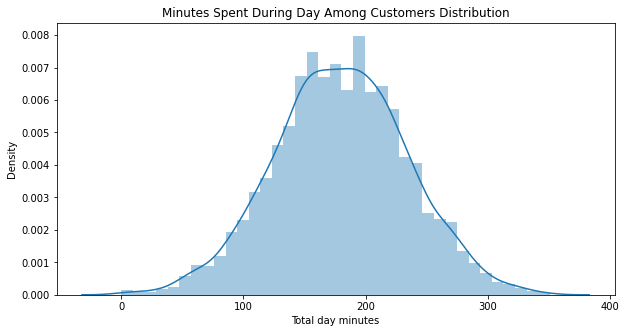

In [ ]:
# TOTAL DAY MINUTES ANALYSIS
day_minutes = telecom_data['Total day minutes']
sns.distplot(day_minutes, hist=True).set(title='Minutes Spent During Day Among Customers Distribution')
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
day_minutes.describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: Total day minutes, dtype: float64

**CUSTOMERS HAVE A MEDIAN VALUE OF ABOUT 179 MINUTES OF CALLTIME DURING DAYTIME. ALSO THE DISTRIBUTION IS NORMAL.**

### **For Total day calls**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


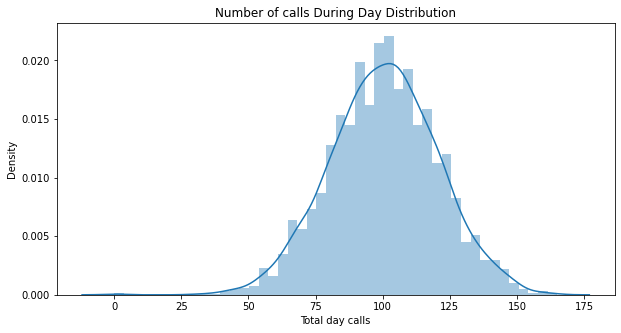

In [ ]:
# TOTAL DAY CALLS ANALYSIS:
day_calls = telecom_data['Total day calls']
sns.distplot(day_calls, hist=True).set(title='Number of calls During Day Distribution')
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
day_calls.describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Total day calls, dtype: float64

**CUSTOMERS MAKE AROUND 101 CALLS DURING DAYTIME. DISTRIBUTION IS NORMAL.**

### **For Total Day Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


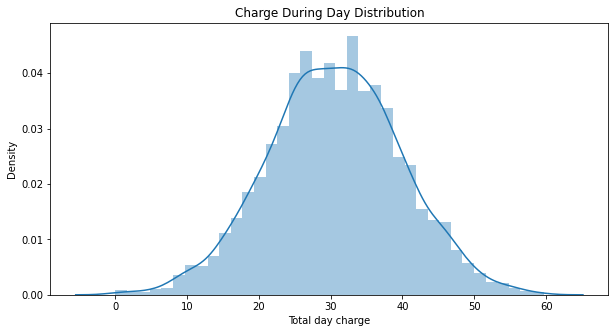

In [ ]:
day_charge = telecom_data['Total day charge']
sns.distplot(day_charge, hist=True).set(title='Charge During Day Distribution')
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
day_charge.describe()

count    3333.000000
mean       30.562307
std         9.259435
min         0.000000
25%        24.430000
50%        30.500000
75%        36.790000
max        59.640000
Name: Total day charge, dtype: float64

**CUSTOMERS PAY ABOUT 30.5 UNITS FOR THEIR CALL MINUTES DURING DAYTIME. DISTRIBUTION IS NORMAL.**

### **For Total Evening Minutes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


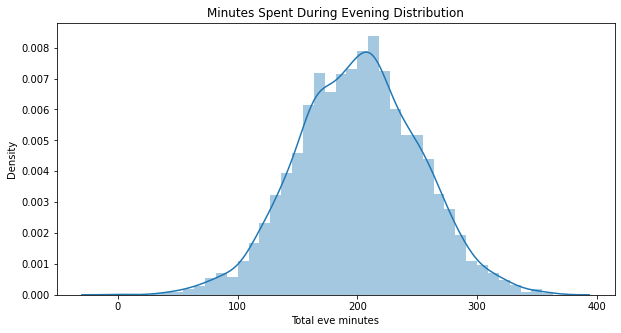

In [ ]:
#  TOTAL EVE MINUTES ANALYSIS:
eve_minutes = telecom_data['Total eve minutes']
sns.distplot(eve_minutes, hist=True).set(title='Minutes Spent During Evening Distribution')
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
eve_minutes.describe()

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: Total eve minutes, dtype: float64

**CUSTOMERS HAVE A MEDIAN VALUE OF ABOUT 201 MINUTES OF CALLTIME DURING EVENING TIME. ALSO THE DISTRIBUTION IS NORMAL.**

### **For Total Eve Calls**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Number of calls During Evening Distribution')]

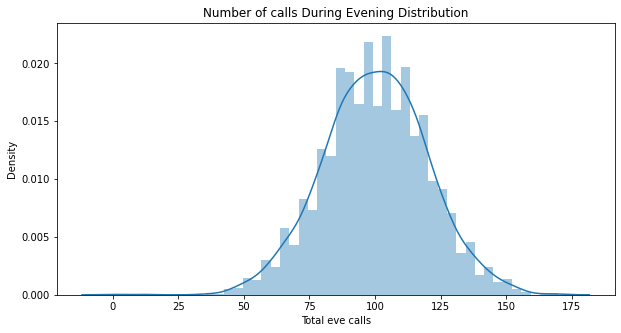

In [ ]:
# TOTAL CALLS EVE ANALYSIS:
eve_calls = telecom_data['Total eve calls']
sns.distplot(eve_calls, hist=True).set(title='Number of calls During Evening Distribution')

In [ ]:
eve_calls.describe()

count    3333.000000
mean      100.114311
std        19.922625
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: Total eve calls, dtype: float64

**CUSTOMERS MAKE AROUND 100 CALLS DURING EVENING TIME. DISTRIBUTION IS NORMAL.**

### **For Total Eve Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Charge During Evening Distribution')]

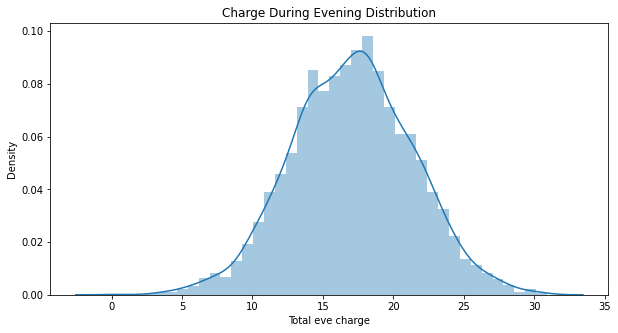

In [ ]:
# TOTAL CHARGE EVE ANALYSIS:
eve_charge = telecom_data['Total eve charge']
sns.distplot(eve_charge, hist=True).set(title='Charge During Evening Distribution')

In [ ]:
eve_charge.describe()

count    3333.000000
mean       17.083540
std         4.310668
min         0.000000
25%        14.160000
50%        17.120000
75%        20.000000
max        30.910000
Name: Total eve charge, dtype: float64

**CUSTOMERS PAY ABOUT 17.12 UNITS FOR THEIR CALL MINUTES DURING EVENING TIME. DISTRIBUTION IS NORMAL.**

### **For Total Night Minutes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Minutes Spent During Night Distribution')]

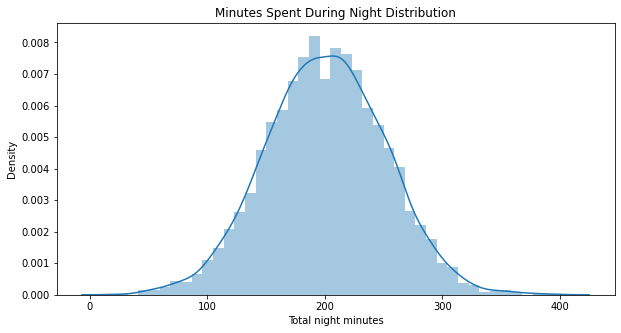

In [ ]:
# TOTAL NIGHT MINUTES ANALYSIS:
night_minutes = telecom_data['Total night minutes']
sns.distplot(night_minutes, hist=True).set(title='Minutes Spent During Night Distribution')

In [ ]:
night_minutes.describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Total night minutes, dtype: float64

**CUSTOMERS HAVE A MEDIAN VALUE OF ABOUT 201 MINUTES OF CALLTIME DURING NIGHT TIME. ALSO THE DISTRIBUTION IS NORMAL.**

### **For Total Night Calls**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Number of calls During Night Distribution')]

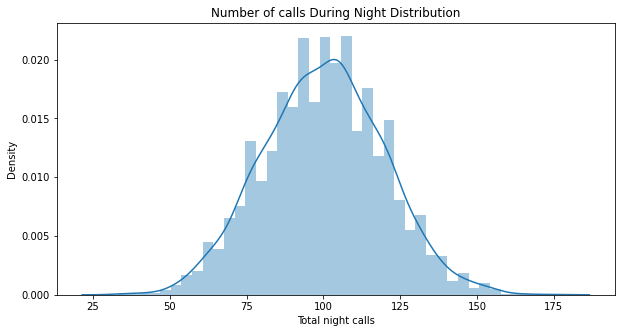

In [ ]:
# TOTAL CALLS NIGHT ANALYSIS:
night_calls = telecom_data['Total night calls']
sns.distplot(night_calls, hist=True).set(title='Number of calls During Night Distribution')

In [ ]:
night_calls.describe()

count    3333.000000
mean      100.107711
std        19.568609
min        33.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: Total night calls, dtype: float64

**CUSTOMERS MAKE AROUND 100 CALLS DURING NIGHT TIME. DISTRIBUTION IS NORMAL.**

### **For Total Night Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Charge During Night Distribution')]

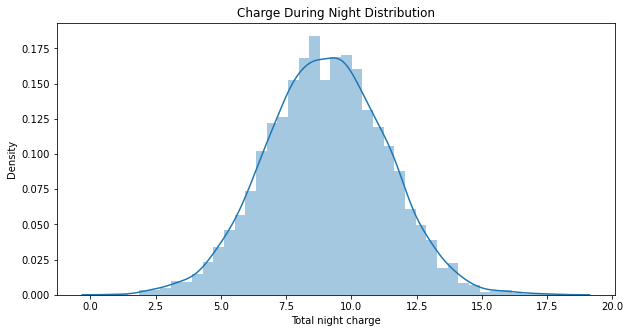

In [ ]:
# TOTAL CHARGE NIGHT ANALYSIS:
night_charge = telecom_data['Total night charge']
sns.distplot(night_charge, hist=True).set(title='Charge During Night Distribution')

In [ ]:
night_charge.describe()

count    3333.000000
mean        9.039325
std         2.275873
min         1.040000
25%         7.520000
50%         9.050000
75%        10.590000
max        17.770000
Name: Total night charge, dtype: float64

**CUSTOMERS PAY ABOUT 9.05 UNITS FOR THEIR CALL MINUTES DURING NIGHT TIME. DISTRIBUTION IS NORMAL.**

### **FOR INTERNATIONAL PLAN USERS**

In [ ]:
int_plan=telecom_data['International plan'].value_counts()
int_plan

No     3010
Yes     323
Name: International plan, dtype: int64

**OUT OF 3333 CUSTOMERS; 323 CUSTOMERS HAVE AN INTERNATIONAL PLAN.**

### **For Total International Minutes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Minutes Distribution')]

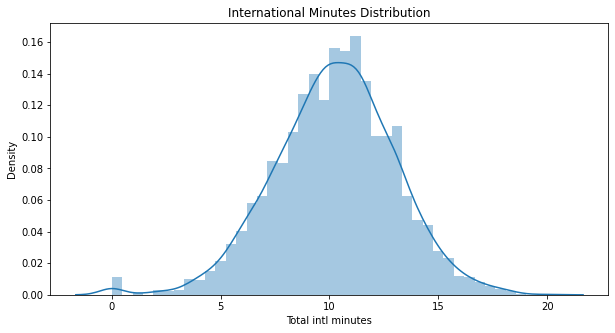

In [ ]:
#  TOTAL INTERNATIONAL MINUTES ANALYSIS:
int_minutes = telecom_data['Total intl minutes']
sns.distplot(int_minutes, hist=True).set(title='International Minutes Distribution')

In [ ]:
int_minutes.describe()

count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: Total intl minutes, dtype: float64

**CUSTOMERS HAVE A MEDIAN VALUE OF ABOUT 10.3 INTERNATIONAL CALL MINUTES. DISTRIBUTION IS NORMAL.**

### **For Total International Calls**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Calls Distribution')]

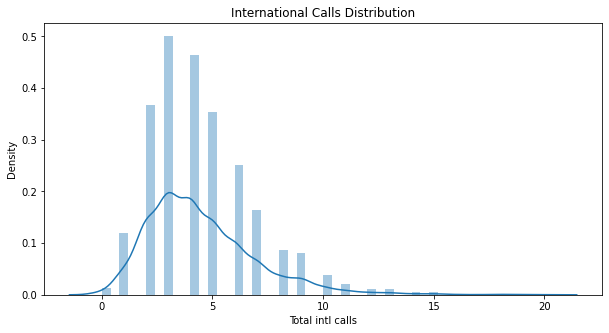

In [ ]:
#  TOTAL INTERNATIONAL CALLS ANALYSIS:
int_calls = telecom_data['Total intl calls']
sns.distplot(int_calls, hist=True).set(title='International Calls Distribution')

In [ ]:
int_calls.describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

**CUSTOMERS HAVE A MEDIAN 4 INTERNATIONAL CALLS.**

### **For Total International Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Charge Distribution')]

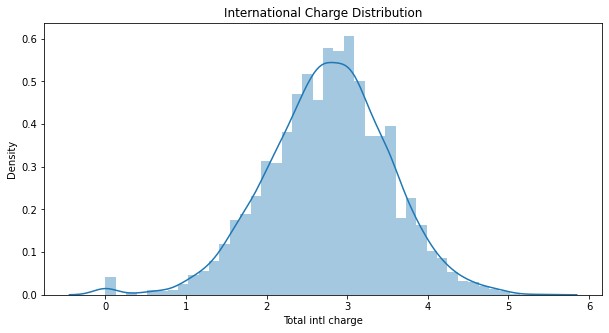

In [ ]:
# TOTAL INTERNATIONAL CHARGE
int_charge = telecom_data['Total intl charge']
sns.distplot(int_charge, hist=True).set(title='International Charge Distribution')

In [ ]:
int_charge.describe()

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: Total intl charge, dtype: float64

**CUSTOMERS PAY ABOUT 2.78 UNITS FOR THEIR INTERNATIONAL CALLS WHICH IS THE MEDIAN VALUE. ALSO DISTRIBUTION IS NORMAL.**

## **Performing conditional analysis on International calls, minutes, charges**

### **ANALYSIS ON CUSTOMERS WHO OPTED IN FOR INTERNATIONAL PLAN**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Minutes Distribution Among People With International Plan')]

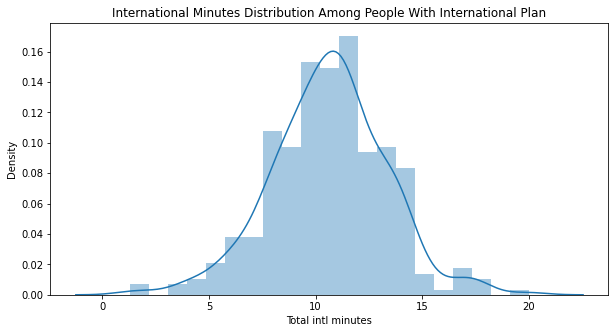

In [ ]:
# TOTAL INTERNATIONAL MINUTES ANALYSIS:
int_minutes_with_plan = telecom_data.loc[telecom_data['International plan']=='Yes','Total intl minutes']
sns.distplot(int_minutes_with_plan, hist=True).set(title='International Minutes Distribution Among People With International Plan')

In [ ]:
int_minutes_with_plan.describe()

count    323.000000
mean      10.628173
std        2.697787
min        1.300000
25%        9.000000
50%       10.800000
75%       12.200000
max       20.000000
Name: Total intl minutes, dtype: float64

**AMONG INTERNATIONAL PLAN USERS; CUSTOMERS HAVE AROUND 10.8 INTERNATIONAL CALL MINUTES WHICH IS THE MEDIAN VALUE.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Calls Distribution Among People With International Plan')]

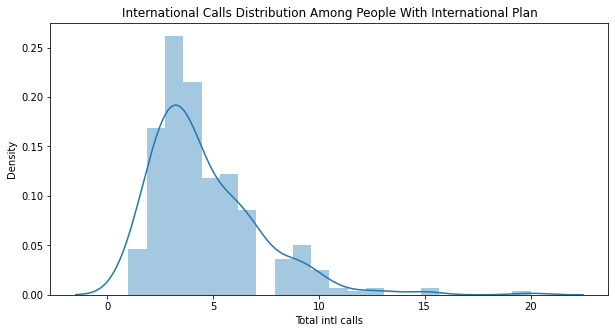

In [ ]:
# TOTAL INTERNATIONAL CALLS ANALYSIS:
int_calls_with_plan = telecom_data.loc[telecom_data['International plan']=='Yes','Total intl calls']
sns.distplot(int_calls_with_plan, hist=True).set(title='International Calls Distribution Among People With International Plan')

In [ ]:
int_calls_with_plan.describe()

count    323.000000
mean       4.609907
std        2.629768
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       20.000000
Name: Total intl calls, dtype: float64

**AMONG INTERNATIONAL PLAN USERS; CUSTOMERS HAVE A MEDIAN 4 INTERNATIONAL CALLS.** 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Charge Distribution Among People With International Plan')]

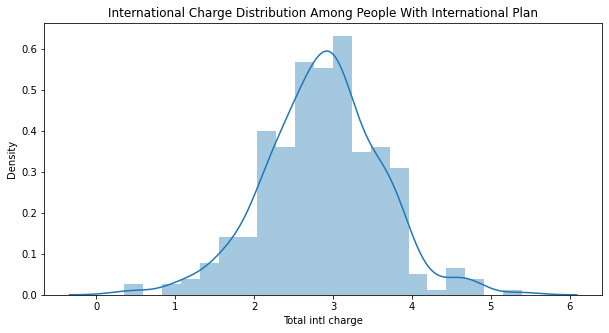

In [ ]:
# TOTAL INTERNATIONAL CHARGE ANALYSIS:
int_charge_with_plan = telecom_data.loc[telecom_data['International plan']=='Yes','Total intl charge']
sns.distplot(int_charge_with_plan, hist=True).set(title='International Charge Distribution Among People With International Plan')

In [ ]:
int_charge_with_plan.describe()

count    323.000000
mean       2.869907
std        0.728151
min        0.350000
25%        2.430000
50%        2.920000
75%        3.290000
max        5.400000
Name: Total intl charge, dtype: float64

**AMONG CUSTOMERS HAVING INTERNATIONAL PLAN; CUSTOMERS ARE CHARGED A MEDIAN 2.92 UNITS FOR THEIR INTERNATIONAL CALL MINUTES.**

###  **ANALYSIS ON CUSTOMERS WHO DID NOT OPT IN FOR INTERNATIONAL PLAN**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Minutes Distribution Among People Without International Plan')]

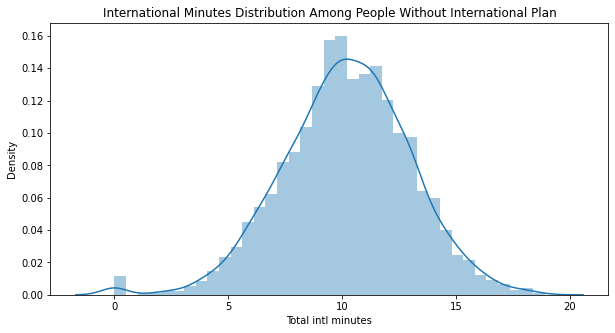

In [ ]:
# TOTAL INTERNATIONAL MINUTES ANALYSIS:
int_minutes_without_plan = telecom_data.loc[telecom_data['International plan']=='No','Total intl minutes']
sns.distplot(int_minutes_without_plan, hist=True).set(title='International Minutes Distribution Among People Without International Plan')

In [ ]:
int_minutes_without_plan.describe()

count    3010.000000
mean       10.195349
std         2.798937
min         0.000000
25%         8.400000
50%        10.200000
75%        12.100000
max        18.900000
Name: Total intl minutes, dtype: float64

**AMONG INTERNATIONAL PLAN NON-USERS; CUSTOMERS HAVE A MEDIAN 10.2 INTERNATIONAL CALL MINUTES.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Calls Distribution Among People Without International Plan')]

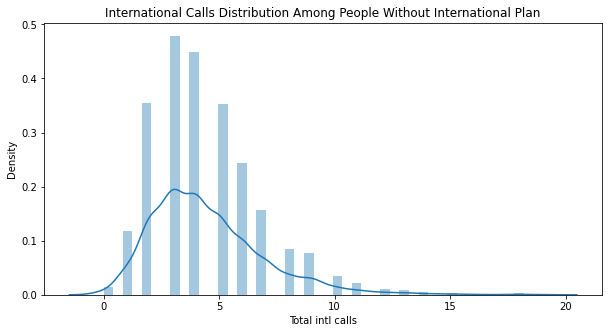

In [ ]:
# TOTAL INTERNATIONAL CALLS ANALYSIS:
int_calls_without_plan = telecom_data.loc[telecom_data['International plan']=='No','Total intl calls']
sns.distplot(int_calls_without_plan, hist=True).set(title='International Calls Distribution Among People Without International Plan')

In [ ]:
int_calls_without_plan.describe()

count    3010.000000
mean        4.465449
std         2.442486
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        19.000000
Name: Total intl calls, dtype: float64

**AMONG INTERNATIONAL PLAN NON-USERS; CUSTOMERS HAVE A MEDIAN 4 INTERNATIONAL CALLS.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'International Charge Distribution Among People Without International Plan')]

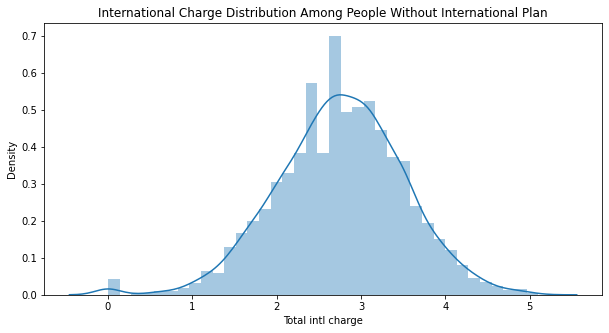

In [ ]:
# TOTAL INTERNATIONAL CHARGE ANALYSIS:
int_charge_without_plan = telecom_data.loc[telecom_data['International plan']=='No','Total intl charge']
sns.distplot(int_charge_without_plan, hist=True).set(title='International Charge Distribution Among People Without International Plan')

In [ ]:
int_charge_without_plan.describe()

count    3010.000000
mean        2.753279
std         0.755716
min         0.000000
25%         2.270000
50%         2.750000
75%         3.270000
max         5.100000
Name: Total intl charge, dtype: float64

**AMONG INTERNATIONAL PLAN NON-USERS; CUSTOMERS PAY ABOUT 2.75 UNITS FOR THEIR INTERNATIONAL CALL MINUTES.**

### **For Customer Service Calls**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Customer Service Calls Distribution')]

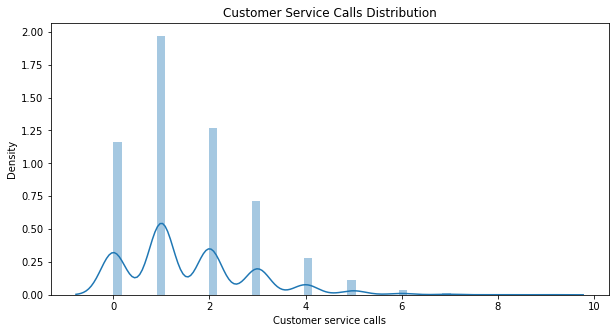

In [ ]:
# CUSTOMER SERVICE CALLS ANALYSIS
custo_calls = telecom_data['Customer service calls']
sns.distplot(custo_calls, hist=True).set(title='Customer Service Calls Distribution')

In [ ]:
custo_calls.describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Customer service calls, dtype: float64

**CUSTOMERS MAKE A MEDIAN 1 CUSTOMER SERVICE CALL.**

### **For Churned Customers**

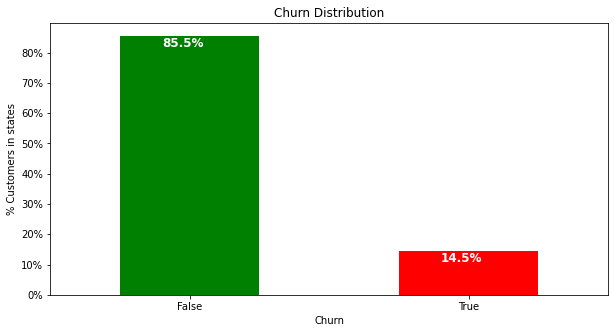

In [ ]:
# CHURN ANALYSIS
colors = ['green','red']
ax = (telecom_data['Churn'].value_counts()*100.0 /len(telecom_data)).plot(kind='bar', stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers in states')
ax.set_xlabel('Churn')
ax.set_ylabel('% Customers in states')
ax.set_title('Churn Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
# get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

**IN OUR CUSTOMER DATASET; 14.5% CUSTOMERS CHURNED WHICH MEANS THEY CANCELLED THEIR SUBSCRIPTION OF THE SERVICE.**

### **For Total Charges**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Customer Total Charges Distribution')]

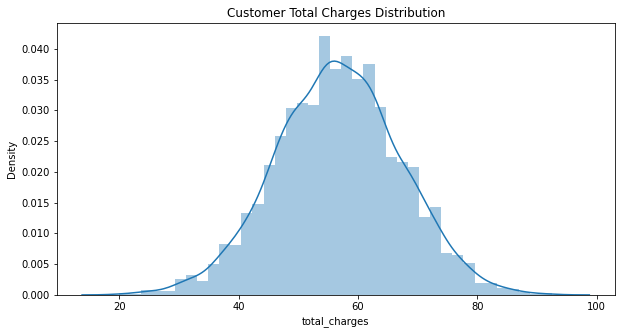

In [ ]:
# TOTAL CHARGES ANALYSIS
total_charges = telecom_data['total_charges']
sns.distplot(total_charges, hist=True).set(title='Customer Total Charges Distribution')

In [ ]:
total_charges.describe()

count    3333.000000
mean       56.685173
std        10.487816
min        19.980000
25%        49.590000
50%        56.630000
75%        63.650000
max        92.560000
Name: total_charges, dtype: float64

**CUSTOMERS PAY A MEDIAN 56.63 UNITS FOR THEIR CALLTIME ON A DAY.**

### **For Total Minutes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Customer Total Call Minutes Distribution')]

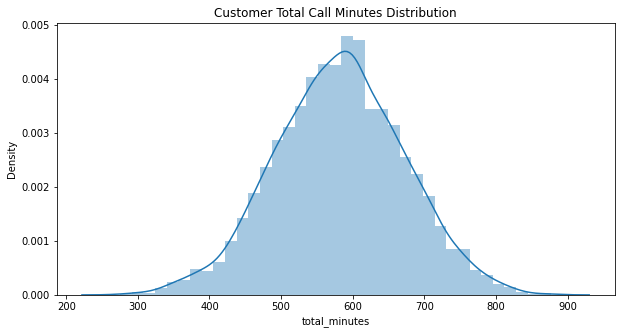

In [ ]:
# TOTAL MINUTES ANALYSIS
total_minutes = telecom_data['total_minutes']
sns.distplot(total_minutes, hist=True).set(title='Customer Total Call Minutes Distribution')

In [ ]:
total_minutes.describe()

count    3333.000000
mean      581.627483
std        89.969330
min       275.200000
25%       521.000000
50%       583.100000
75%       642.500000
max       876.900000
Name: total_minutes, dtype: float64

**CUSTOMERS HAVE A MEDIAN 583.1 CALL MINUTES ON A DAY.**

**UNIVARIATE ANALYSIS FORMED A PRELIMINARY STEP OF OUR EDA.
ONCE WE UNDERSTOOD THE INDIVIDUAL FIELDS AND OBSERVED THEIR TRENDS; ITS TIME TO FIND OUT RELATION AMONG MULTIPLE FIELDS WHICH 'COULD' PROVIDE FACTORS WHICH CONTRIBUTE TO CHURNING OR 'COULD' LEAD TO CUSTOMER RETENTION.**

## **HEATMAP FOR THE DATASET**

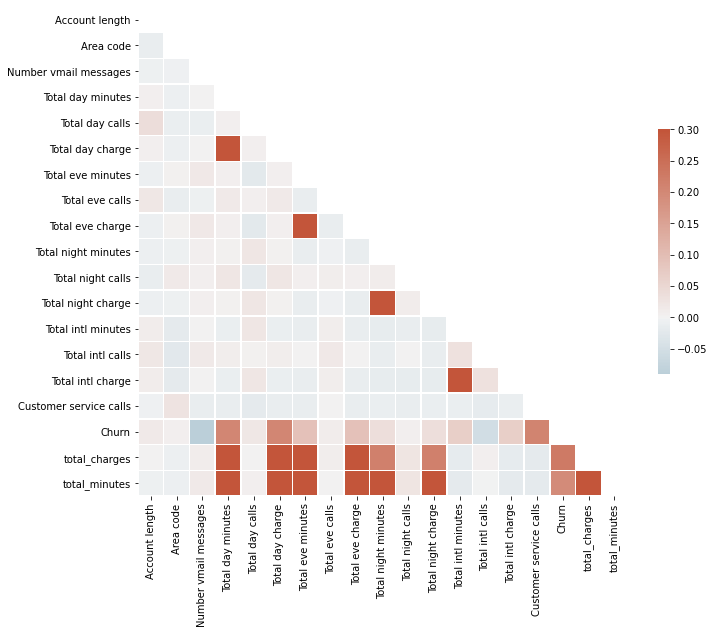

In [ ]:
# Getting A Heatmap Co-Relating Various Columns
corr = telecom_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**THE HEATMAP SHOWS CO-RELATION AMONG VARIOUS FIELDS OF THE DATASET WHICH CAN BE USED TO PERFORM BIVARIATE ANALYSIS.**

# **Performing Bi-Variate Analysis With 'Churn' As Pivot Column**

### **For 'State' Column**

In [ ]:
# Finding the churn percentage in various states
# Finding the unqiue states
list_of_states = list(set(telecom_data['State'])) 
true_churn_num = []
false_churn_num = []
# Getting churned customers in each state
for i in list_of_states:
  true_churn_num.append(telecom_data.loc[(telecom_data['State']==i) & (telecom_data['Churn']==True),'Churn'].count())  
# Getting customers who did not churn in each state
for i in list_of_states:
  false_churn_num.append(telecom_data.loc[(telecom_data['State']==i) & (telecom_data['Churn']==False),'Churn'].count())  

# Calculating churn percentage in each state and storing in a list
percentage_list = []
for i in range(51):
  percentage = (true_churn_num[i]/(true_churn_num[i]+false_churn_num[i]))*100
  percentage_list.append(percentage)
# Creating a dictionary where key is 'State' and value is 'churn percentage' in that state.
dict_of_states_churn_percentage = dict(zip(list_of_states,percentage_list))
# Sorting the dictionary on basis of values.
sort_list_of_states_churn_percentage = sorted(dict_of_states_churn_percentage.items(), key=lambda x: x[1], reverse=True)
for i in sort_list_of_states_churn_percentage:
	print(i[0], i[1])

NJ 26.47058823529412
CA 26.47058823529412
TX 25.0
MD 24.285714285714285
SC 23.333333333333332
MI 21.91780821917808
MS 21.53846153846154
WA 21.21212121212121
NV 21.21212121212121
ME 20.967741935483872
MT 20.588235294117645
AR 20.0
KS 18.571428571428573
NY 18.072289156626507
MN 17.857142857142858
PA 17.77777777777778
MA 16.923076923076923
CT 16.216216216216218
NC 16.176470588235293
NH 16.071428571428573
GA 14.814814814814813
OK 14.754098360655737
DE 14.754098360655737
OR 14.102564102564102
UT 13.88888888888889
CO 13.636363636363635
KY 13.559322033898304
SD 13.333333333333334
OH 12.82051282051282
FL 12.698412698412698
IN 12.676056338028168
ID 12.32876712328767
WY 11.688311688311687
MO 11.11111111111111
VT 10.95890410958904
AL 10.0
ND 9.67741935483871
NM 9.67741935483871
WV 9.433962264150944
TN 9.433962264150944
DC 9.25925925925926
RI 9.230769230769232
WI 8.974358974358974
IL 8.620689655172415
NE 8.19672131147541
LA 7.8431372549019605
IA 6.8181818181818175
VA 6.493506493506493
AZ 6.25
AK 5

**WE GET THE CHURN PERCENTAGE IN EACH STATE AND HAVE THE LIST SORTED IN DESCENDING FASHION.**

### **For Account Length**

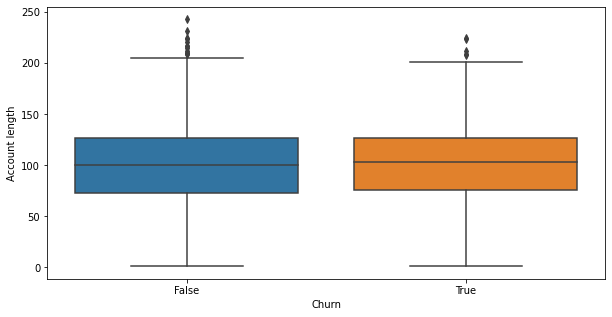

In [ ]:
sns.boxplot(x="Churn", y="Account length", data=telecom_data)

**THE MEDIAN ACCOUNT LENGTH IN CASE OF CUSTOMERS WHO CHURNED AND WHO DID NOT CHURN IS ALMOST EQUAL.**
**THIS INDICATES THAT ACCOUNT LENGTH IS NOT A FACTOR LEADING TO CHURNING.**

### **For Area Code**

Text(0.5, 0, '(Area Code, Churn Status)')

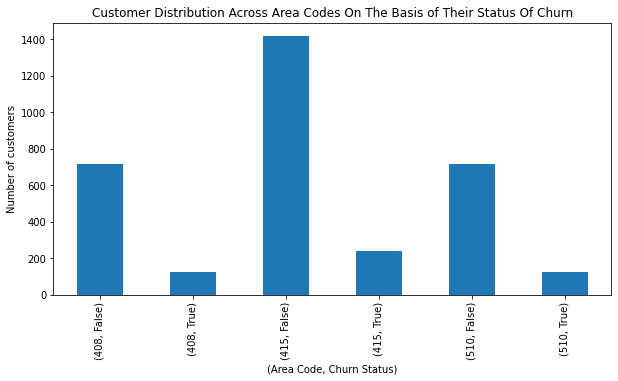

In [ ]:
area_code_churn=telecom_data.groupby('Area code')['Churn'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize'] = (15,5)
plt.title('Customer Distribution Across Area Codes On The Basis of Their Status Of Churn')
plt.ylabel('Number of customers')
plt.xlabel('(Area Code, Churn Status)')

**The barplot shows the number of customers who churned and who did not churn in various area codes. Area code however does not signify any factor leading to churning; it is just a distribution of customers on the basis of their churn status.**

**However it is also noted that the number of churned customers is almost equal in the three area codes indicating that we will not dive further into analysis of churned customers on the basis of area code.**

### **For Number of Vmail messages**

In [ ]:
telecom_data.loc[telecom_data['Churn']==True,'Number vmail messages'].describe()

count    483.000000
mean       5.115942
std       11.860138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: Number vmail messages, dtype: float64

In [ ]:
telecom_data.loc[telecom_data['Churn']==False,'Number vmail messages'].describe()

count    2850.000000
mean        8.604561
std        13.913125
min         0.000000
25%         0.000000
50%         0.000000
75%        22.000000
max        51.000000
Name: Number vmail messages, dtype: float64

**This analysis of number of voice mail messages among churned and not churned customers shows that in both cases the median value is zero. However this result is not new since we already know that majority of customers do not have voice plan which means that for them number of voice mail messages will be zero.**

### **For voice mail plan**

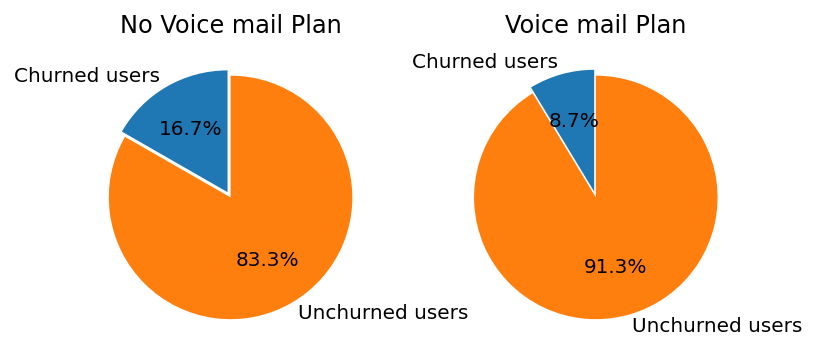

In [ ]:
# # Using groupby method to group voice mail plan users and non-users and then further classifying on their churn status.
voice_churn_rate = telecom_data.groupby(['Voice mail plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
churn_perct_with_no_voice_plan = round((voice_churn_rate.iloc[0,0]*100),3)
unchurn_perct_with_no_voice_plan = 100 - churn_perct_with_no_voice_plan
churn_perct_with_voice_plan = round((voice_churn_rate.iloc[1,0]*100),3)
unchurn_perct_with_voice_plan = 100 - churn_perct_with_voice_plan

# Getting a list of percentages with and without voice mail plan on basis of churn status.
x1 = [churn_perct_with_no_voice_plan, unchurn_perct_with_no_voice_plan]
x2 = [churn_perct_with_voice_plan, unchurn_perct_with_voice_plan]

# Plotting pie chart
labels = ['Churned users', 'Unchurned users']
explode = [0.05, 0]
fig = plt.figure(figsize=(6,7),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(x1, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax2.pie(x2, labels = labels,explode = explode, autopct='%1.1f%%', startangle=90)
ax1.set_title('No Voice mail Plan')
ax2.set_title('Voice mail Plan')
plt.show()

**VOICE MAIL PLAN USERS HAVE ABOUT HALF CHURN PERCENTAGE IN COMPARISON TO NON-USERS. HOWEVER THE NUMBER OF VOICE MAIL PLAN USERS IS LESS SIGNIFICANTLY. ALSO FURTHER ANALYSIS CANNOT BE DONE BECAUSE AMONG CUSTOMERS WHO DO NOT HAVE A VOICE MAIL PLAN; THE NUMBER OF VMAIL MESSAGES IS ALWAYS ZERO.**

### **For Total day minutes**

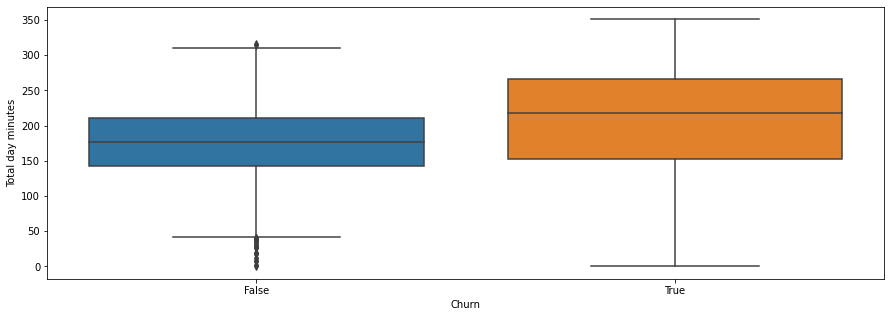

In [ ]:
sns.boxplot(x="Churn", y="Total day minutes", data=telecom_data)

**CHURNED CUSTOMERS HAVE GREATER CALL MINUTES DURING DAYTIME. THE DIFFERENCE IN THEIR MEDIAN VALUE IS 40 MINUTES WHICH IS A SIGNIFICANT DIFFERENCE AND THIS RESULT CAN BE USED FOR FURTHER ANALYSIS.**

### **For Total day calls**

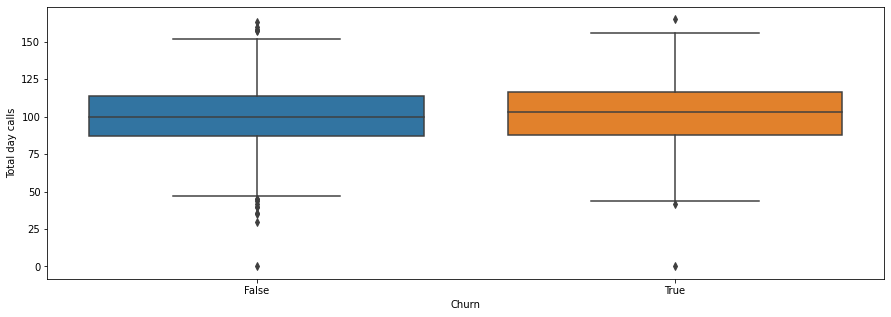

In [ ]:
sns.boxplot(x="Churn", y="Total day calls", data=telecom_data)

**CUSTOMERS WHO CHURNED AND WHO DID NOT CHURN HAVE ABOUT IDENTICAL NUMBER OF CALLS DURING DAYTIME INDICATING THAT 'TOTAL DAY CALLS' WILL NOT BE USED FOR FURTHER ANALYSIS.**

### **For Total Day Charges**

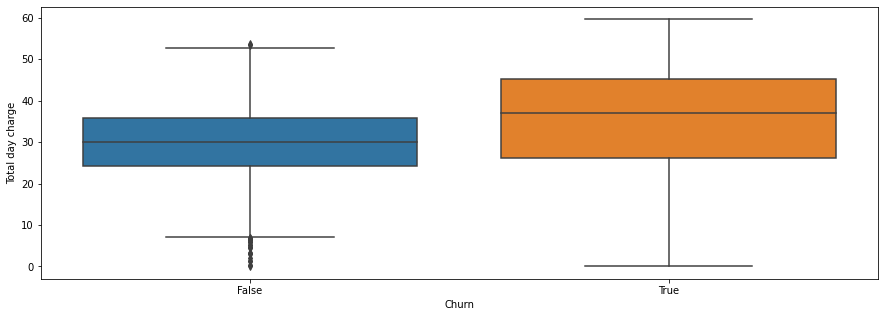

In [ ]:
sns.boxplot(x="Churn", y="Total day charge", data=telecom_data)

**TOTAL CHARGES PAID BY CHURNED CUSTOMERS DURING DAYTIME IS SIGNIFICANTLY GREATER THAN CUSTOMERS WHO DID NOT CHURN. THIS MAKES SENSE BECAUSE 'TOTAL DAY MINUTES' FOR CHURNED CUSTOMERS IS ALSO SIGNIFICANTLY GREATER THAN CUSTOMERS WHO DID NOT CHURN.**

### **For Total Evening Minutes**

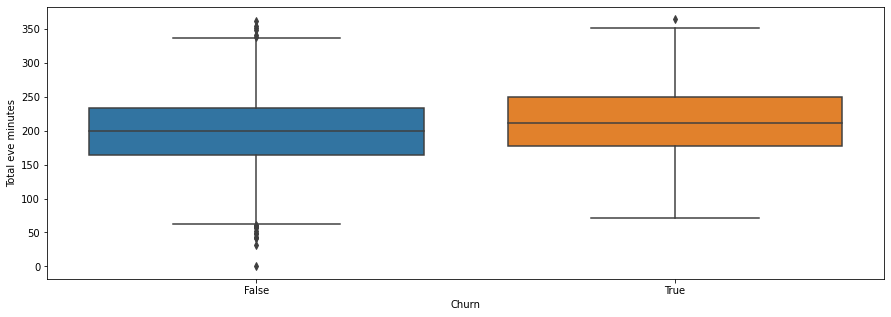

In [ ]:
sns.boxplot(x="Churn", y="Total eve minutes", data=telecom_data)

**CHURNED CUSTOMERS HAVE RELATIVELY GREATER EVENING CALL MINUTES THAN CUSTOMERS WHO DID NOT CHURN.**

### **For Total Eve Calls**

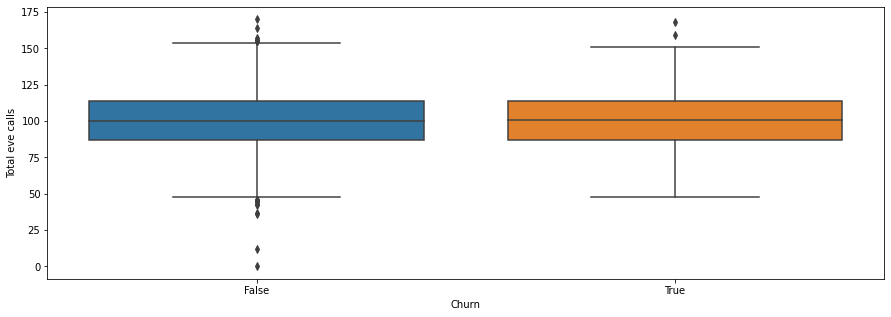

In [ ]:
sns.boxplot(x="Churn", y="Total eve calls", data=telecom_data)

**CUSTOMERS WHO CHURNED AND WHO DID NOT CHURN HAVE ABOUT IDENTICAL NUMBER OF CALLS DURING EVENING TIME INDICATING THAT 'TOTAL EVE CALLS' WILL NOT BE USED FOR FURTHER ANALYSIS.**

### **For Total Eve Charges**

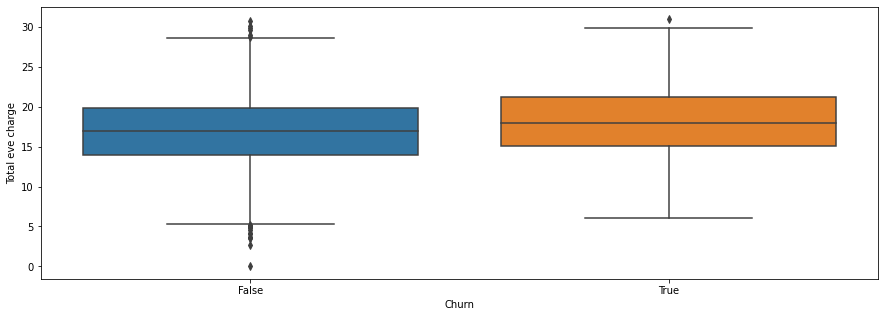

In [ ]:
sns.boxplot(x="Churn", y="Total eve charge", data=telecom_data)

**TOTAL CHARGES PAID BY CHURNED CUSTOMERS DURING EVENING TIME IS RELATIVELY GREATER THAN CUSTOMERS WHO DID NOT CHURN. THIS MAKES SENSE BECAUSE 'TOTAL EVE MINUTES' FOR CHURNED CUSTOMERS IS ALSO RELATIVELY GREATER THAN CUSTOMERS WHO DID NOT CHURN.**

### **For Total Night Minutes**

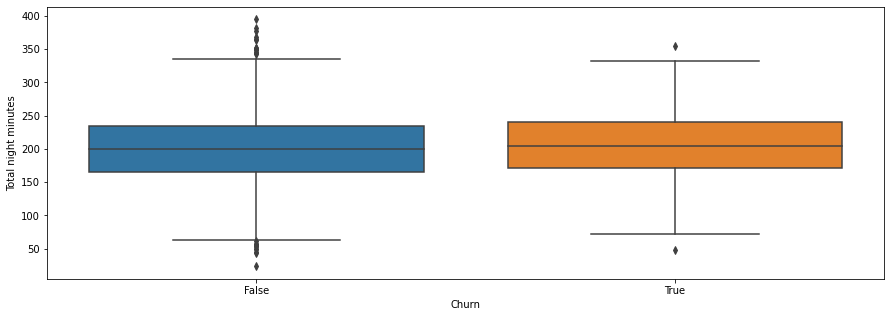

In [ ]:
sns.boxplot(x="Churn", y="Total night minutes", data=telecom_data)

**CHURNED CUSTOMERS HAVE ALMOST IDENTICAL NIGHT CALL MINUTES THAN CUSTOMERS WHO DID NOT CHURN.**

### **For Total Night Calls**

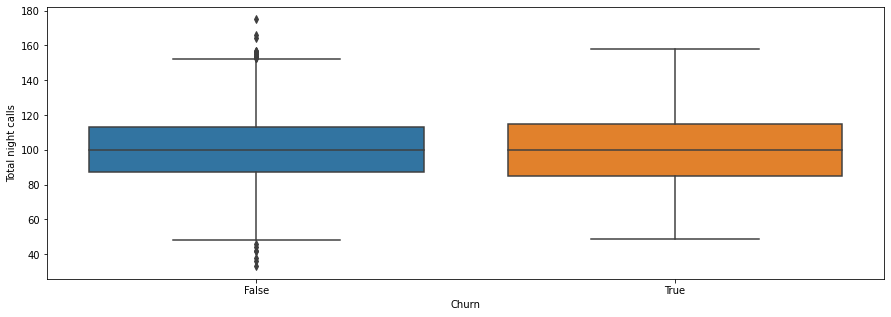

In [ ]:
sns.boxplot(x="Churn", y="Total night calls", data=telecom_data)

**CUSTOMERS WHO CHURNED AND WHO DID NOT CHURN HAVE ABOUT IDENTICAL NUMBER OF CALLS DURING NIGHT TIME INDICATING THAT 'TOTAL NIGHT CALLS' WILL NOT BE USED FOR FURTHER ANALYSIS.**

### **For Total Night Charges**

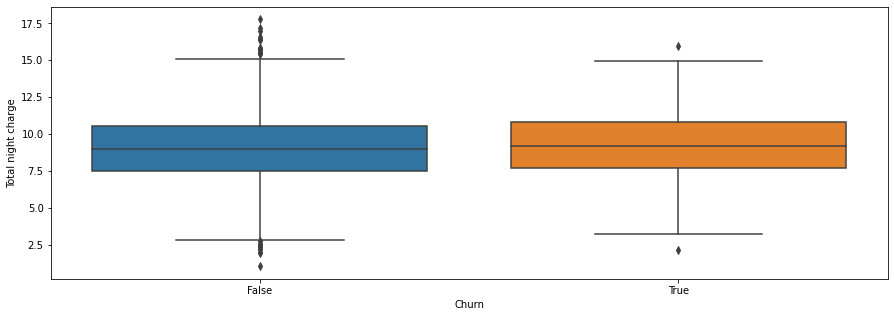

In [ ]:
sns.boxplot(x="Churn", y="Total night charge", data=telecom_data)

**TOTAL CHARGES PAID BY CHURNED CUSTOMERS DURING NIGHT TIME IS ALMOST IDENTICAL TO CUSTOMERS WHO DID NOT CHURN. THIS MAKES SENSE BECAUSE 'TOTAL NIGHT MINUTES' FOR CHURNED CUSTOMERS IS ALMOST IDENTICAL TO CUSTOMERS WHO DID NOT CHURN.**

### **For Total International Minutes**

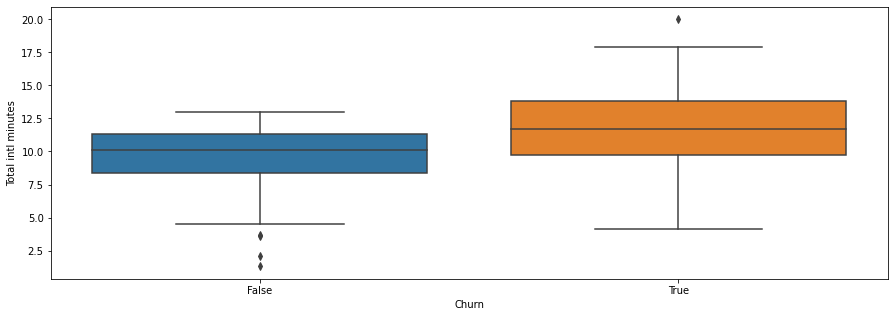

In [ ]:
intl_plan_activated_data = telecom_data.loc[telecom_data['International plan']=='Yes']
sns.boxplot(x="Churn", y="Total intl minutes", data=intl_plan_activated_data)

**INTERNATIONAL CALL MINUTES AMONG CHURNED CUSTOMERS IS SIGNIFICANTLY GREATER THAN CUSTOMERS WHO DID NOT CHURN.**

### **For Total International Calls**

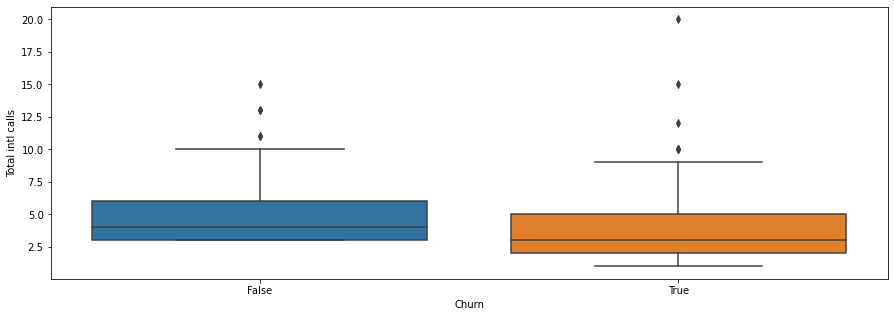

In [ ]:
sns.boxplot(x="Churn", y="Total intl calls", data=intl_plan_activated_data)

**CHURNED CUSTOMERS HAVE A RELATIVELY LOWER MEDIAN INTERNATIONAL CALLS AS COMPARED TO CUSTOMERS WHO DID NOT CHURN. HOWEVER THIS DOES NOT IMPROVE OUR ANALYSIS RESULTS SINCE A CUSTOMER IS CHARGED ON BASIS OF MINUTES AND NOT NUMBER OF CALLS.**

### **For Total International Charges**

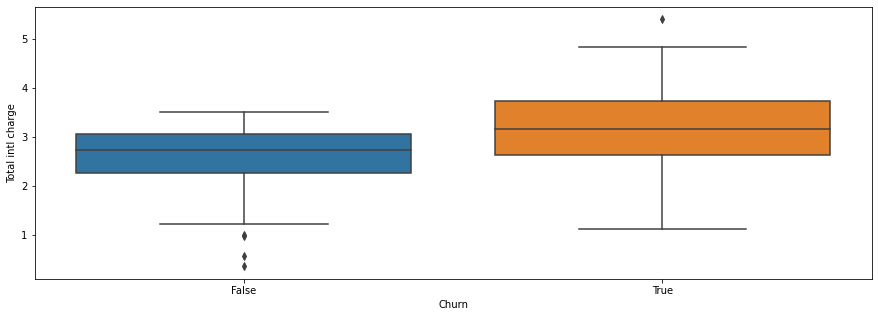

In [ ]:
sns.boxplot(x="Churn", y="Total intl charge", data=intl_plan_activated_data)

**CHURNED CUSTOMERS PAY SIGNIFICANTLY GREATER INTERNATIONAL CHARGES THAN CUSTOMERS WHO DID NOT CHURN. THIS MAKES SENSE SINCE CHURNED CUSTOMERS HAVE GREATER INTERNATIONAL CALL MINUTES.**

### **ANALYSIS ON BASIS OF INTERNATIONAL PLAN**

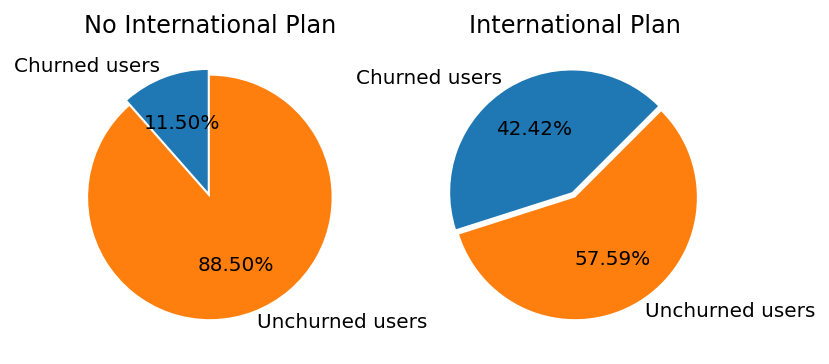

In [ ]:
# Using groupby method to group international plan users and non-users and then further classifying on their churn status.
Intl_churn_rate = telecom_data.groupby(['International plan'])['Churn'].agg([np.mean]).rename(columns = {'mean':'churn_rate'})
churn_perct_with_no_Intl_plan = round((Intl_churn_rate.iloc[0,0]*100),3)
unchurn_perct_with_no_Intl_plan = 100 - churn_perct_with_no_Intl_plan
churn_perct_with_Intl_plan = round((Intl_churn_rate.iloc[1,0]*100),3)
unchurn_perct_with_Intl_plan = 100 - churn_perct_with_Intl_plan

# Getting a list of percentages with and without international plan on basis of churn status.
x1 = [churn_perct_with_no_Intl_plan, unchurn_perct_with_no_Intl_plan]
x2 = [churn_perct_with_Intl_plan, unchurn_perct_with_Intl_plan]

# Plotting a pie-chart
labels = ['Churned users', 'Unchurned users']
explode = [0.05, 0]
fig = plt.figure(figsize=(6,7),dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.pie(x1, labels = labels,explode = explode, autopct='%1.2f%%', startangle=90)
ax2.pie(x2, labels = labels,explode = explode, autopct='%1.2f%%', startangle=45)
ax1.set_title('No International Plan')
ax2.set_title('International Plan')
plt.show()

**IT IS NOW VERIFIED THAT CHURN PERCENTAGE IS SIGNIFICANTLY HIGHER AMONG USERS OF INTERNATIONAL PLAN. THIS MEANS THAT 'INTERNATIONAL PLAN' FUELS CHURNING OF CUSTOMERS.**

**ALSO LET US FIND OUT THE CHURN PERCENTAGE AMONG INTERNATIONAL PLAN USERS IN TOP 6 STATES WITH HIGHEST CHURN PERCENTAGE.**

In [ ]:
top_6_df = telecom_data.loc[(telecom_data['State']=='CA') | (telecom_data['State']=='NJ') | (telecom_data['State']=='TX') | (telecom_data['State']=='MD') | (telecom_data['State']=='SC') | (telecom_data['State']=='MI')]

# COUNT OF INTERNATIONAL PLAN USERS IN THESE 6 STATES
intl_plan_count_top6 = top_6_df.loc[top_6_df['International plan']=='Yes','Churn'].count()

# COUNT OF CUSTOMERS WHO CHURNED IN THESE 6 STATES
churn_count_top6 = top_6_df.loc[(top_6_df['International plan']=='Yes') & (top_6_df['Churn']==True),'Churn'].count()

percentage_churn_top6_intl_plan = (churn_count_top6 / intl_plan_count_top6)*100
print(round(percentage_churn_top6_intl_plan,2))

59.46


**HENCE COMPARING OVERALL OF 42.42% WITH 59.46% FOR TOP6 STATES ON BASIS OF CHURN PERCENTAGE; OUR ASSUMPTION THAT INTERNATIONAL PLAN FUELS CHURNING OF CUSTOMERS IS FURTHER STRENGTHENED.**

### **For Customer Service Calls**

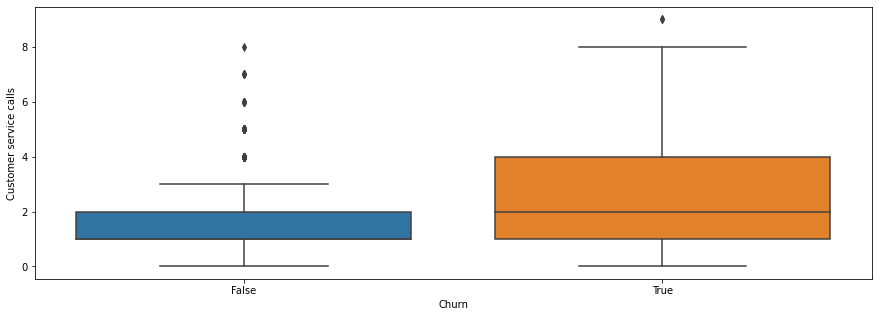

In [ ]:
sns.boxplot(x="Churn", y="Customer service calls", data=telecom_data)

**CHURNED CUSTOMERS ARE MAKING GREATER NUMBER OF CUSTOMER SERVICE CALLS THAN CUSTOMERS WHO DID NOT CHURN.**

**Let us now find the churn percentage across number of customer service calls.**

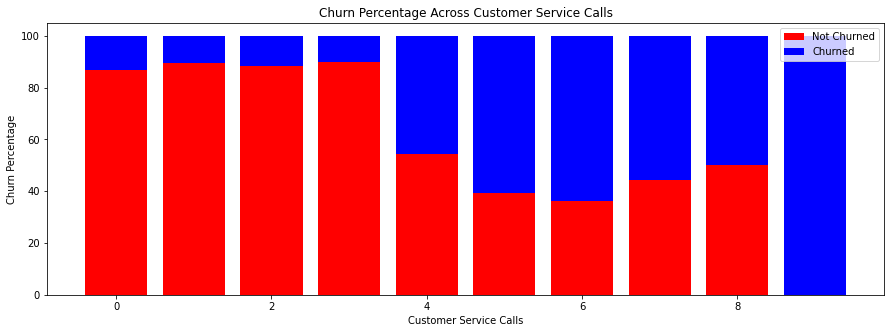

In [ ]:
# List of distinct 'number of customer service calls'
list_of_cust_calls = list(set(telecom_data['Customer service calls'])) 
true_churn_num1 = []
false_churn_num1 = []
# Getting churned customers in each 'customer service call number'
for i in list_of_cust_calls:
  true_churn_num1.append(telecom_data.loc[(telecom_data['Customer service calls']==i) & (telecom_data['Churn']==True),'Churn'].count())  
# Getting customers who did not churn in each 'customer service call number'
for i in list_of_cust_calls:
  false_churn_num1.append(telecom_data.loc[(telecom_data['Customer service calls']==i) & (telecom_data['Churn']==False),'Churn'].count())  

# Calculating churn percentage in each 'customer service call number'
true_churn_percentage = []
for i in range(10):
  percentage_churn = (true_churn_num1[i]/(true_churn_num1[i]+false_churn_num1[i]))*100
  true_churn_percentage.append(percentage_churn)
# Calculating percentage of customers who did not churn in each 'customer service call number'.
false_churn_percentage = []
for i in range(10):
  percentage_not_churn = (false_churn_num1[i]/(true_churn_num1[i]+false_churn_num1[i]))*100
  false_churn_percentage.append(percentage_not_churn)

# Plotting the result
plt.bar(list_of_cust_calls, false_churn_percentage, color='r')
plt.bar(list_of_cust_calls, true_churn_percentage, bottom=false_churn_percentage, color='b')
plt.xlabel("Customer Service Calls")
plt.ylabel("Churn Percentage")
plt.legend(["Not Churned", "Churned"])
plt.title("Churn Percentage Across Customer Service Calls")
plt.rcParams['figure.figsize'] = (15,5)
plt.show()

**IT IS NOW VERIFIED THAT CUSTOMER SERVICE CALLS FUEL CHURNING OF CUSTOMERS.**

### **For Total Minutes**

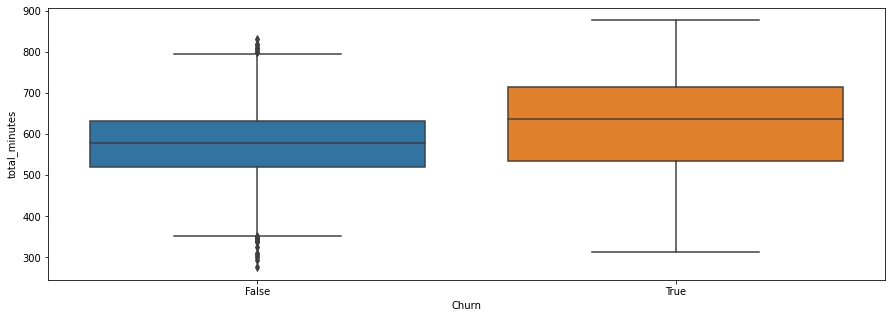

In [ ]:
sns.boxplot(x="Churn", y="total_minutes", data=telecom_data)

**CHURNED CUSTOMERS HAVE GREATER CALL MINUTES OVERALL SIGNIFICANTLY.**

### **For Total Charges**

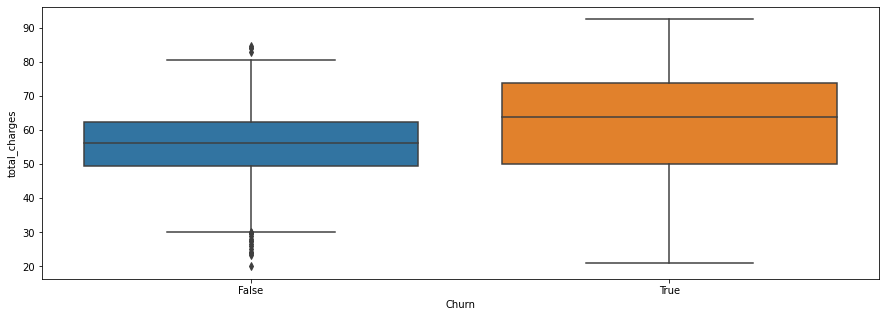

In [ ]:
sns.boxplot(x="Churn", y="total_charges", data=telecom_data)

**CHURNED CUSTOMERS PAY GREATER CHARGES OVERALL ON A DAY THAN CUSTOMERS WHO DID NOT CHURN. THIS MAKES SENSE SINCE THEIR USAGE OR TOTAL CALL MINUTES IS ALSO GREATER.**

## **PERFORMING BIVARIATE ANALYSIS AMONG INDEPENDENT FIELDS**

### **BIVARIATE ANALYSIS BETWEEN INTERNATIONAL MINUTES PER UNIT CHARGE AND INTERNATIONAL PLAN**

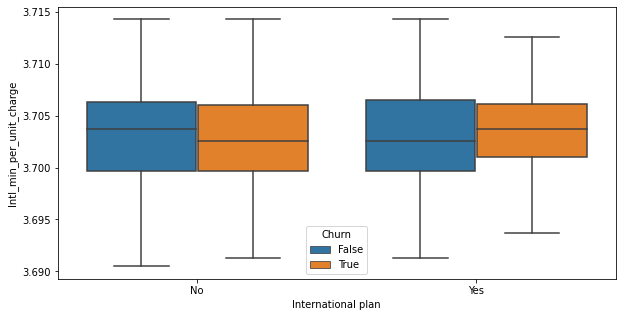

In [ ]:
# GETTING INTERNATIONAL MINUTES PER UNIT CHARGE BY DIVIDING 'Total Intl Minutes' WITH 'Total Intl Charge'
telecom_data['Intl_min_per_unit_charge'] = telecom_data['Total intl minutes']/telecom_data['Total intl charge']
plt.figure(figsize=(10,5))
sns.boxplot(data = telecom_data, y = 'Intl_min_per_unit_charge', x = 'International plan', hue = 'Churn', sym = '')

**FROM THE BOXPLOT; WE SEE THAT BOTH INTERNATIONAL PLAN USERS AND NON-USERS GET ROUGHLY SAME NUMBER OF INTERNATIONAL MINUTES PER UNIT CHARGE. THIS LEADS TO A RECOMMENDATION THAT INTERNATIONAL PLAN OF THE CONCERNED COMPANY HAS TO BE REVISED.**

### **BIVARIATE ANALYSIS BETWEEN CUSTOMER SERVICE CALLS AND INTERNATIONAL PLAN USERS AND NON-USERS CATEGORISED ON BASIS OF CHURN STATUS**

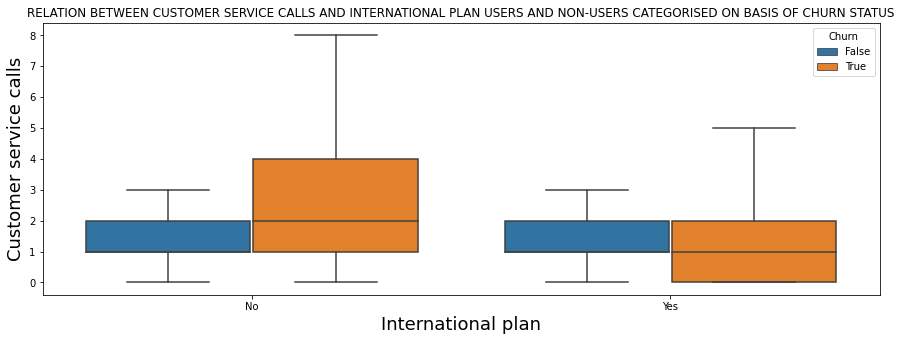

In [ ]:
# Plotting a boxplot for the analysis
import seaborn as sns
sns.boxplot(x = 'International plan',
            y = 'Customer service calls',
            data = telecom_data,
            sym = "",                  
            hue = "Churn") 
plt.xlabel('International plan', fontsize=18)
plt.ylabel('Customer service calls', fontsize=18)
plt.title('RELATION BETWEEN CUSTOMER SERVICE CALLS AND INTERNATIONAL PLAN USERS AND NON-USERS CATEGORISED ON BASIS OF CHURN STATUS',fontsize=12)
plt.show()

**AMONG INTERNATIONAL PLAN USERS AND NON-USERS; CHURNED CUSTOMERS WITH NO INTERNATIONAL PLAN ARE MAKING MEDIAN 2 CUSTOMER SERVICE CALLS IN COMPARISON TO CHURNED CUSTOMERS WITH INTERNATIONAL PLAN WHO ARE MAKING MEDIAN 1 CUSTOMER SERVICE CALL.**

### **BIVARIATE ANALYSIS BETWEEN TOTAL DAY MINUTES AND CHURN ON THE BASIS OF NUMBER OF CUSTOMER SERVICE CALLS. THE REASON TO TAKE TOTAL DAY MINUTES IS BECAUSE OF THE FACT THAT DURING DAYTIME CUSTOMERS ARE PAYING THE HIGHEST CHARGE WITH LEAST CALL MINUTES AND HENCE MAY PROVE TO BE A FACTOR TRIGGERRING CUSTOMER CHURNING.**

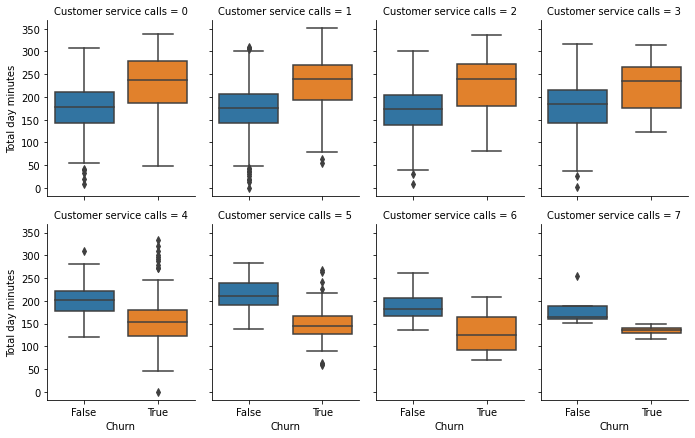

In [ ]:
# Relation between customer service calls and Churn for various Customer service calls
sns.catplot(x='Churn', y = 'Total day minutes', col='Customer service calls',
data=telecom_data[telecom_data['Customer service calls'] < 8], kind = 'box', col_wrap=4, height=3, aspect=0.8)

**AS CUSTOMER SERVICE CALLS INCREASES; CALL MINUTES AMONG CHURNED CUSTOMERS DURING DAYTIME INCREASES WHICH INDICATES THAT PERCENTAGE OF CHURNING INCREASES LEADING TO LESSER CUSTOMERS IN THIS CATEGORY AND HENCE LESSER CALL MINUTES DURING DAYTIME.**

### **DISTRIBUTION OF CHURNED CUSTOMER PERCENTAGE IN VARIOUS MONTHS. HERE MONTHS ARE OBTAINED BY DIVIDING ACCOUNT LENGTH BY 28.**
**28 DAYS IS THE STANDARD MONTH DURATION FOR TELECOM COMPANIES.**

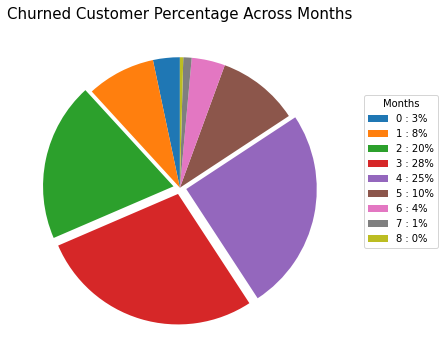

In [ ]:
# Dividing Dataset between churned customers and customers who did not churn
telecom_churned = telecom_data[telecom_data['Churn'] == True]
telecom_unchurned = telecom_data[telecom_data['Churn'] == False]

# Adding column 'Months' to classify data into months
telecom_churned = telecom_churned.assign(Months = lambda x: (x['Account length'] //28))
telecom_unchurned = telecom_unchurned.assign(Months = lambda x: (x['Account length'] //28))

# Doing monthly analysis for both datasets
monthly_analysis_churned = telecom_churned.groupby('Months')['Months'].describe()
monthly_analysis_unchurned = telecom_unchurned.groupby('Months')['Months'].describe()

# Distribution of churned customers over months
monthly_analysis_churned.reset_index(inplace=True)
plt.rcParams['figure.figsize'] = (10, 6)
monthly_analysis_churned = monthly_analysis_churned.assign(Churned_customers_percentage = lambda x: (x['count'] /sum(monthly_analysis_churned['count']) * 100))
list_of_percentages = list(monthly_analysis_churned['Churned_customers_percentage'].values)

# Adding new labels to show percentage
zipped_dict = dict(zip([0,1,2,3,4,5,6,7,8],list_of_percentages))
new_labels = []
for data in zipped_dict.items():
  new_labels.append(str(data[0]) + ' : ' + str(round(data[1])) + '%')
labels=new_labels
myexplode = [0,0,0.05,0.05,0.05,0,0,0,0]
plt.pie(list_of_percentages,explode=myexplode,startangle = 90)
plt.legend(labels, title='Months', bbox_to_anchor = (1.05, 0.8))
plt.title('Churned Customer Percentage Across Months',fontsize=15)
plt.show()


**MAJORITY OF CHURNING OF CUSTOMERS OCCURS IN THE INTERNVAL OF 2 TO 4 MONTHS WHICH IN TEMRS OF ACCOUNT LENGTH IS BETWEEN 84 DAYS AND 140 DAYS.**

### **DISTRIBUTION OF CHURNED CUSTOMER PERCENTAGE OVER TOTAL CALLING HOURS. HERE TOTAL CALLING HOURS IS OBTAINED BY DIVIDING TOTAL CALL MINUTES BY 60.**

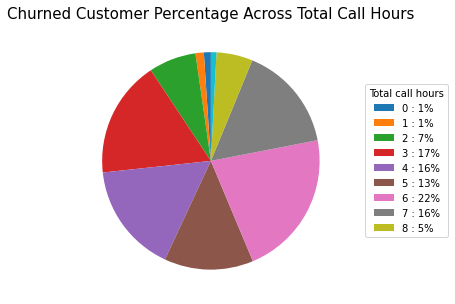

In [ ]:
# Creating 'Total_hours' columns in the 'telecom_churned' dataframe created
telecom_churned = telecom_churned.assign(Total_hours = lambda x: (x['total_minutes'] //60 ))
hourly_telecom_churned = telecom_churned.groupby('Total_hours')['Total_hours'].describe()
hourly_telecom_churned.reset_index(inplace=True)

# Getting the list of churned customer percentages on basis of total call hours
hourly_telecom_churned = hourly_telecom_churned.assign(Churned_customers_percentage = lambda x: (x['count'] /sum(hourly_telecom_churned['count']) * 100))
list_of_percentages2 = list(hourly_telecom_churned['Churned_customers_percentage'].values)

# Adding new labels to show percentage
zipped_dict = dict(zip([0,1,2,3,4,5,6,7,8],list_of_percentages2))
new_labels = []
for data in zipped_dict.items():
  new_labels.append(str(data[0]) + ' : ' + str(round(data[1])) + '%')

# Plotting a pie-chart
labels = new_labels
plt.pie(list_of_percentages2,startangle = 90)
plt.legend(new_labels,title='Total call hours',bbox_to_anchor = (1.05, 0.8))
plt.title('Churned Customer Percentage Across Total Call Hours',fontsize=15)
plt.show()

**CUSTOMERS WHO HAD TOTAL CALL HOURS EQUAL TO 11 HOURS HAD THE HIGHEST CHURN PERCENTAGE**

## **INFERENCES**

1. Based on the analysis it can be said that the Churn customers are paying significant tariff mostly during the day hours even though the duration of call minutes is the least among three.

2. Customer churn increases as the the number of Customer call increases (goes beyond 3).

3. There is no significant effect of Area code on attrition as the churn ratio is almost same for all area codes. The Churn percentage is 25-26% for top five states.

4. Churn ratio on the International plan is 4 times higher than those who have not any international plan

5. No advantage of having International plan for the customers as the International Charges/min for International plan users and non-users are almost same.

6. The median values of the Total number of day, evening, night calls are roughly the same across churn and non-churn population, however the median values of the duration of day, evening and night calls and charges for that across the churn population is slightly higher than the non-churn population.






## **FACTORS RESPONSIBLE FOR CHURNING**



1.   Higher call rate during the day hours.
2.   Increase in customer service calls triggered churning of  
     customers.
3.   International plan facility is not effectively optimized or structured  properly which leads to customer dissatisfaction.




## **RECOMMENDATIONS**



1.   Charging rate should be managed especially for the day time and long duration call. Telecom companies have to analyze which model can be profitable for them even after reducing the tariff. 
2.   Telecom Companies can provide incentives for talking more number of minutes.
3.   International plan needs to be improved. International call rates can be optimized.
4.   Grievance redressal for users should be tackled within 2-3 Customer service calls.
5.   Focus on top 5 states where churning rate is higher. An improved and versatile network facility can be set up.



